In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
milk_data=pd.read_csv("milknew.csv")
milk_data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
milk_data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [4]:
milk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
milk_data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
milk_data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [7]:
milk_data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

In [9]:
milk_data['Grade']=labelEncoder.fit_transform(milk_data['Grade'])
milk_data['Grade'].unique()


array([0, 1, 2])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grade', ylabel='count'>

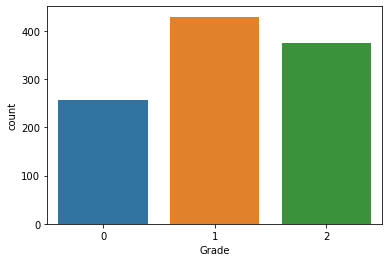

In [10]:
sns.countplot(milk_data['Grade'])

In [11]:
target=milk_data['Grade']
milk_data=milk_data.drop('Grade',axis=1)

In [12]:
milk_data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [13]:
x_train,x_test,y_train,y_test=train_test_split(milk_data,target,test_size=0.20,random_state=12)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
655,6.7,38,1,0,1,0,255
37,7.4,65,0,0,0,0,255
468,6.6,35,0,1,1,1,255
326,6.8,45,0,1,1,1,255
241,6.6,38,0,0,0,0,255


In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.05113209, -0.63089999,  0.91941063, ...,  0.69898244,
        -0.98709623,  0.72716139],
       [ 0.55139972,  2.09806766, -1.0876533 , ..., -1.43065111,
        -0.98709623,  0.72716139],
       [-0.02033471, -0.93411862, -1.0876533 , ...,  0.69898244,
         1.01307245,  0.72716139],
       ...,
       [-0.09180151, -0.73197287, -1.0876533 , ..., -1.43065111,
        -0.98709623,  0.72716139],
       [ 2.05220259, -1.0351915 ,  0.91941063, ..., -1.43065111,
         1.01307245,  0.72716139],
       [ 1.40900136,  1.0873389 , -1.0876533 , ...,  0.69898244,
         1.01307245,  0.72716139]])

In [15]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [16]:
x_train.iloc[81]

0    0.122599
1    0.076610
2    0.919411
3    1.116550
4    0.698982
5   -0.987096
6   -1.590016
Name: 81, dtype: float64

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred=model.predict(x_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
y_actual=y_test
y_pred

array([0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2])

In [21]:
y_actual

50      0
13      1
1054    2
711     2
569     2
       ..
386     0
595     2
1029    2
721     2
929     2
Name: Grade, Length: 212, dtype: int32

In [22]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        49
           1       0.87      0.92      0.89        84
           2       0.94      0.82      0.88        79

    accuracy                           0.87       212
   macro avg       0.86      0.87      0.86       212
weighted avg       0.87      0.87      0.87       212



<AxesSubplot:>

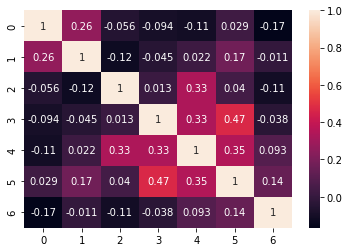

In [23]:
sns.heatmap(x_train.corr(),annot=True)

In [24]:
pca = PCA(n_components=2)
principal_comp1 = pca.fit_transform(x_train)
principal_comp2 = pca.fit_transform(x_test)

In [25]:
principal_comp1

array([[ 0.33410601, -1.19199081],
       [ 2.04866251,  1.70811144],
       [-1.36399969, -0.00721637],
       ...,
       [ 1.99286135, -0.52812705],
       [-0.34903145,  0.69083723],
       [-1.17970468,  2.16297551]])

In [26]:
pc_model = LogisticRegression()
pc_model.fit(principal_comp1,y_train)

LogisticRegression()

In [27]:
y_predict=pc_model.predict(principal_comp2)

In [28]:
y_predict

array([0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1,
       0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1,
       1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.62      0.31      0.41        49
           1       0.67      0.76      0.71        84
           2       0.75      0.87      0.81        79

    accuracy                           0.70       212
   macro avg       0.68      0.65      0.64       212
weighted avg       0.69      0.70      0.68       212



In [30]:
principal_components = pca.components_
print("Principal Components:")
print(principal_components)

Principal Components:
[[-0.05830757 -0.25109993 -0.29600566 -0.43491266 -0.52171391 -0.58820656
  -0.19649002]
 [ 0.51926361  0.68854561 -0.32898208 -0.10157604 -0.23584325  0.17913848
  -0.22363075]]


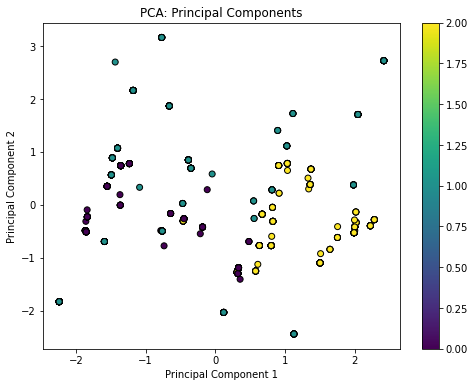

In [31]:
import matplotlib.pyplot as plt
# Create a scatter plot to visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_comp1[:, 0], principal_comp1[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components')
plt.colorbar()

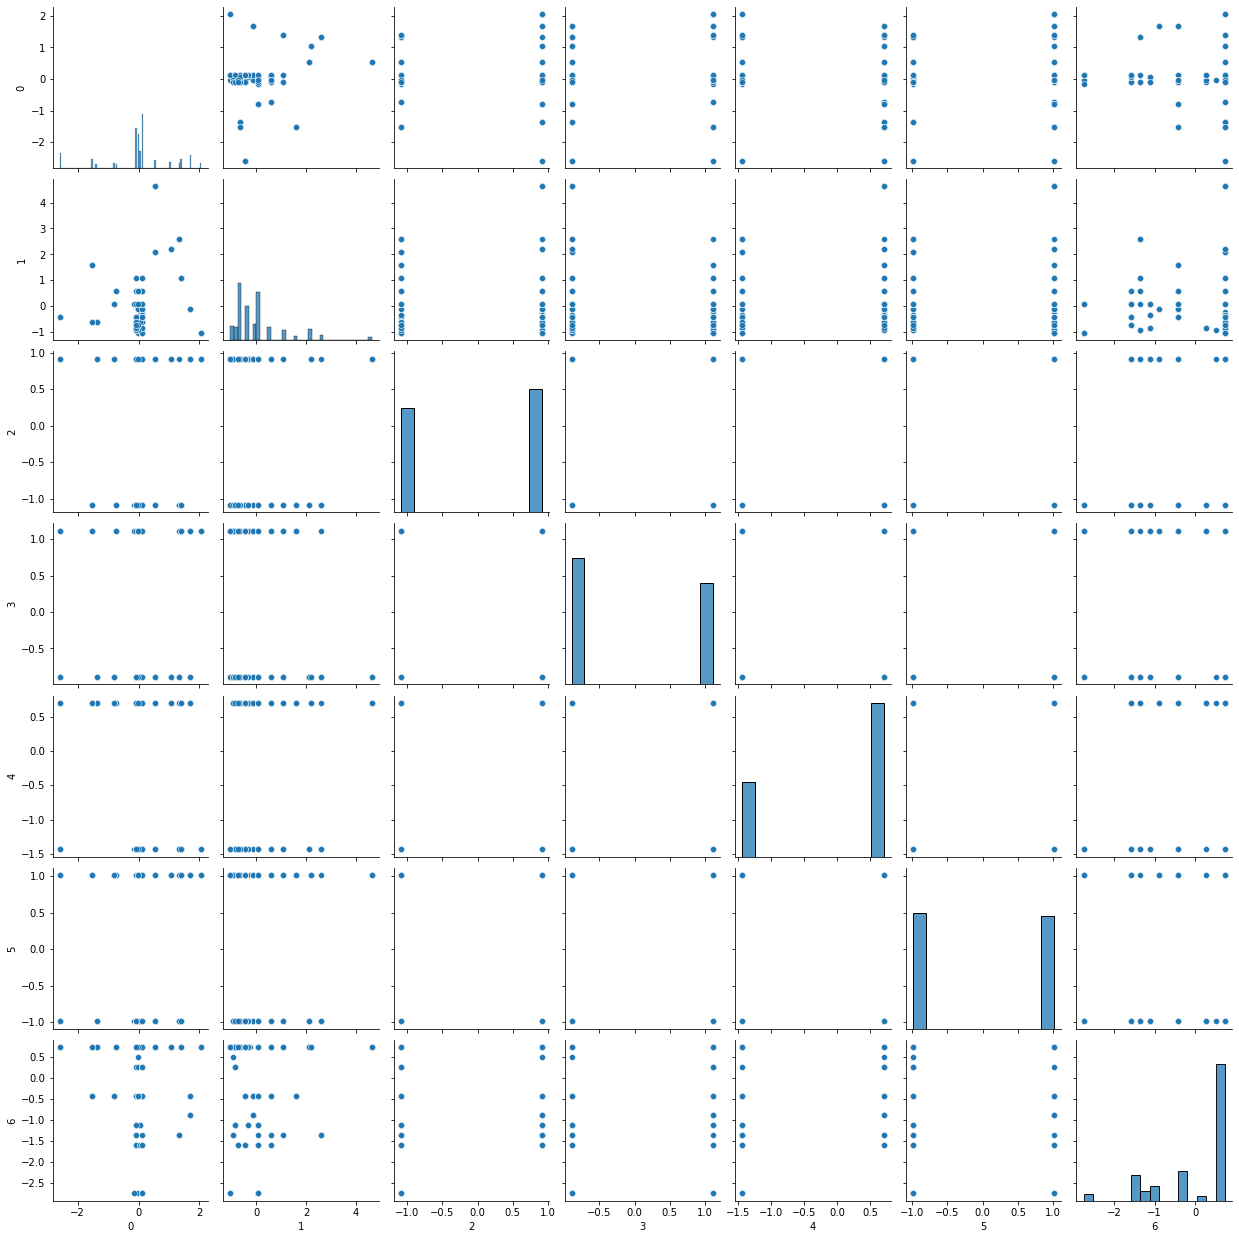

In [32]:
sns.pairplot(x_train)